In [1]:
# IMPORTING ALL THE LIBRARIES
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
# LOADING THE DATASET
dataset = pd.read_csv('lung cancer dataset (updated).csv')

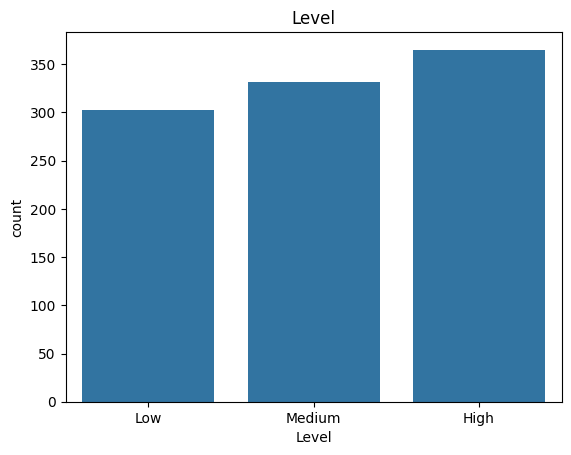

In [3]:
# WORKING ON SOME vISUALIZATION

sns.countplot(data=dataset, x='Level')
plt.title('Level')
plt.show()

Text(0.5, 1.0, 'Result')

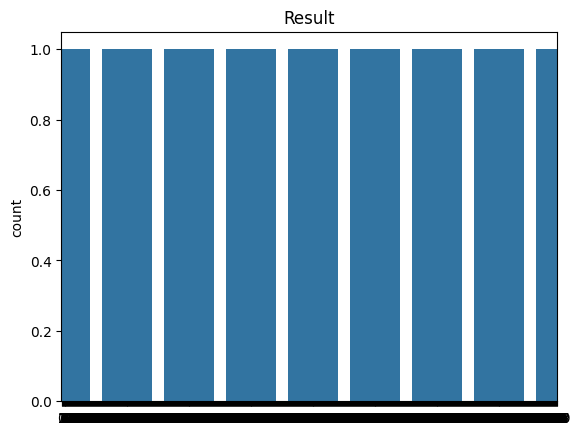

In [4]:
sns.countplot(dataset['Result'])
plt.title('Result')

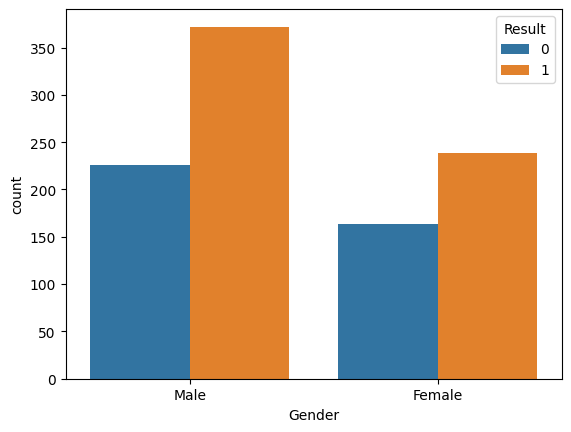

In [5]:
g1 = sns.countplot(x="Gender", hue="Result",data = dataset)

<function matplotlib.pyplot.show(close=None, block=None)>

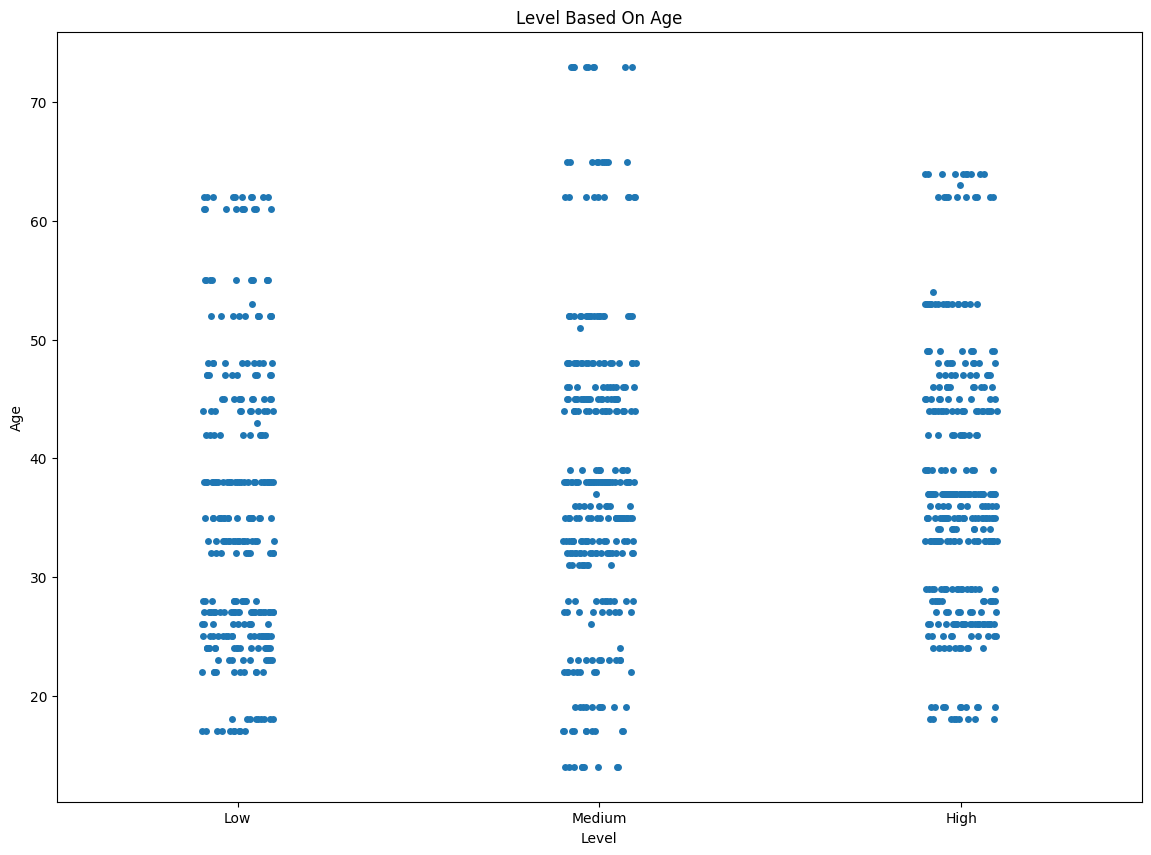

In [6]:
a4_dims = (14,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(x="Level", y="Age", data=dataset, jitter=True);
plt.title('Level Based On Age')
plt.show

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

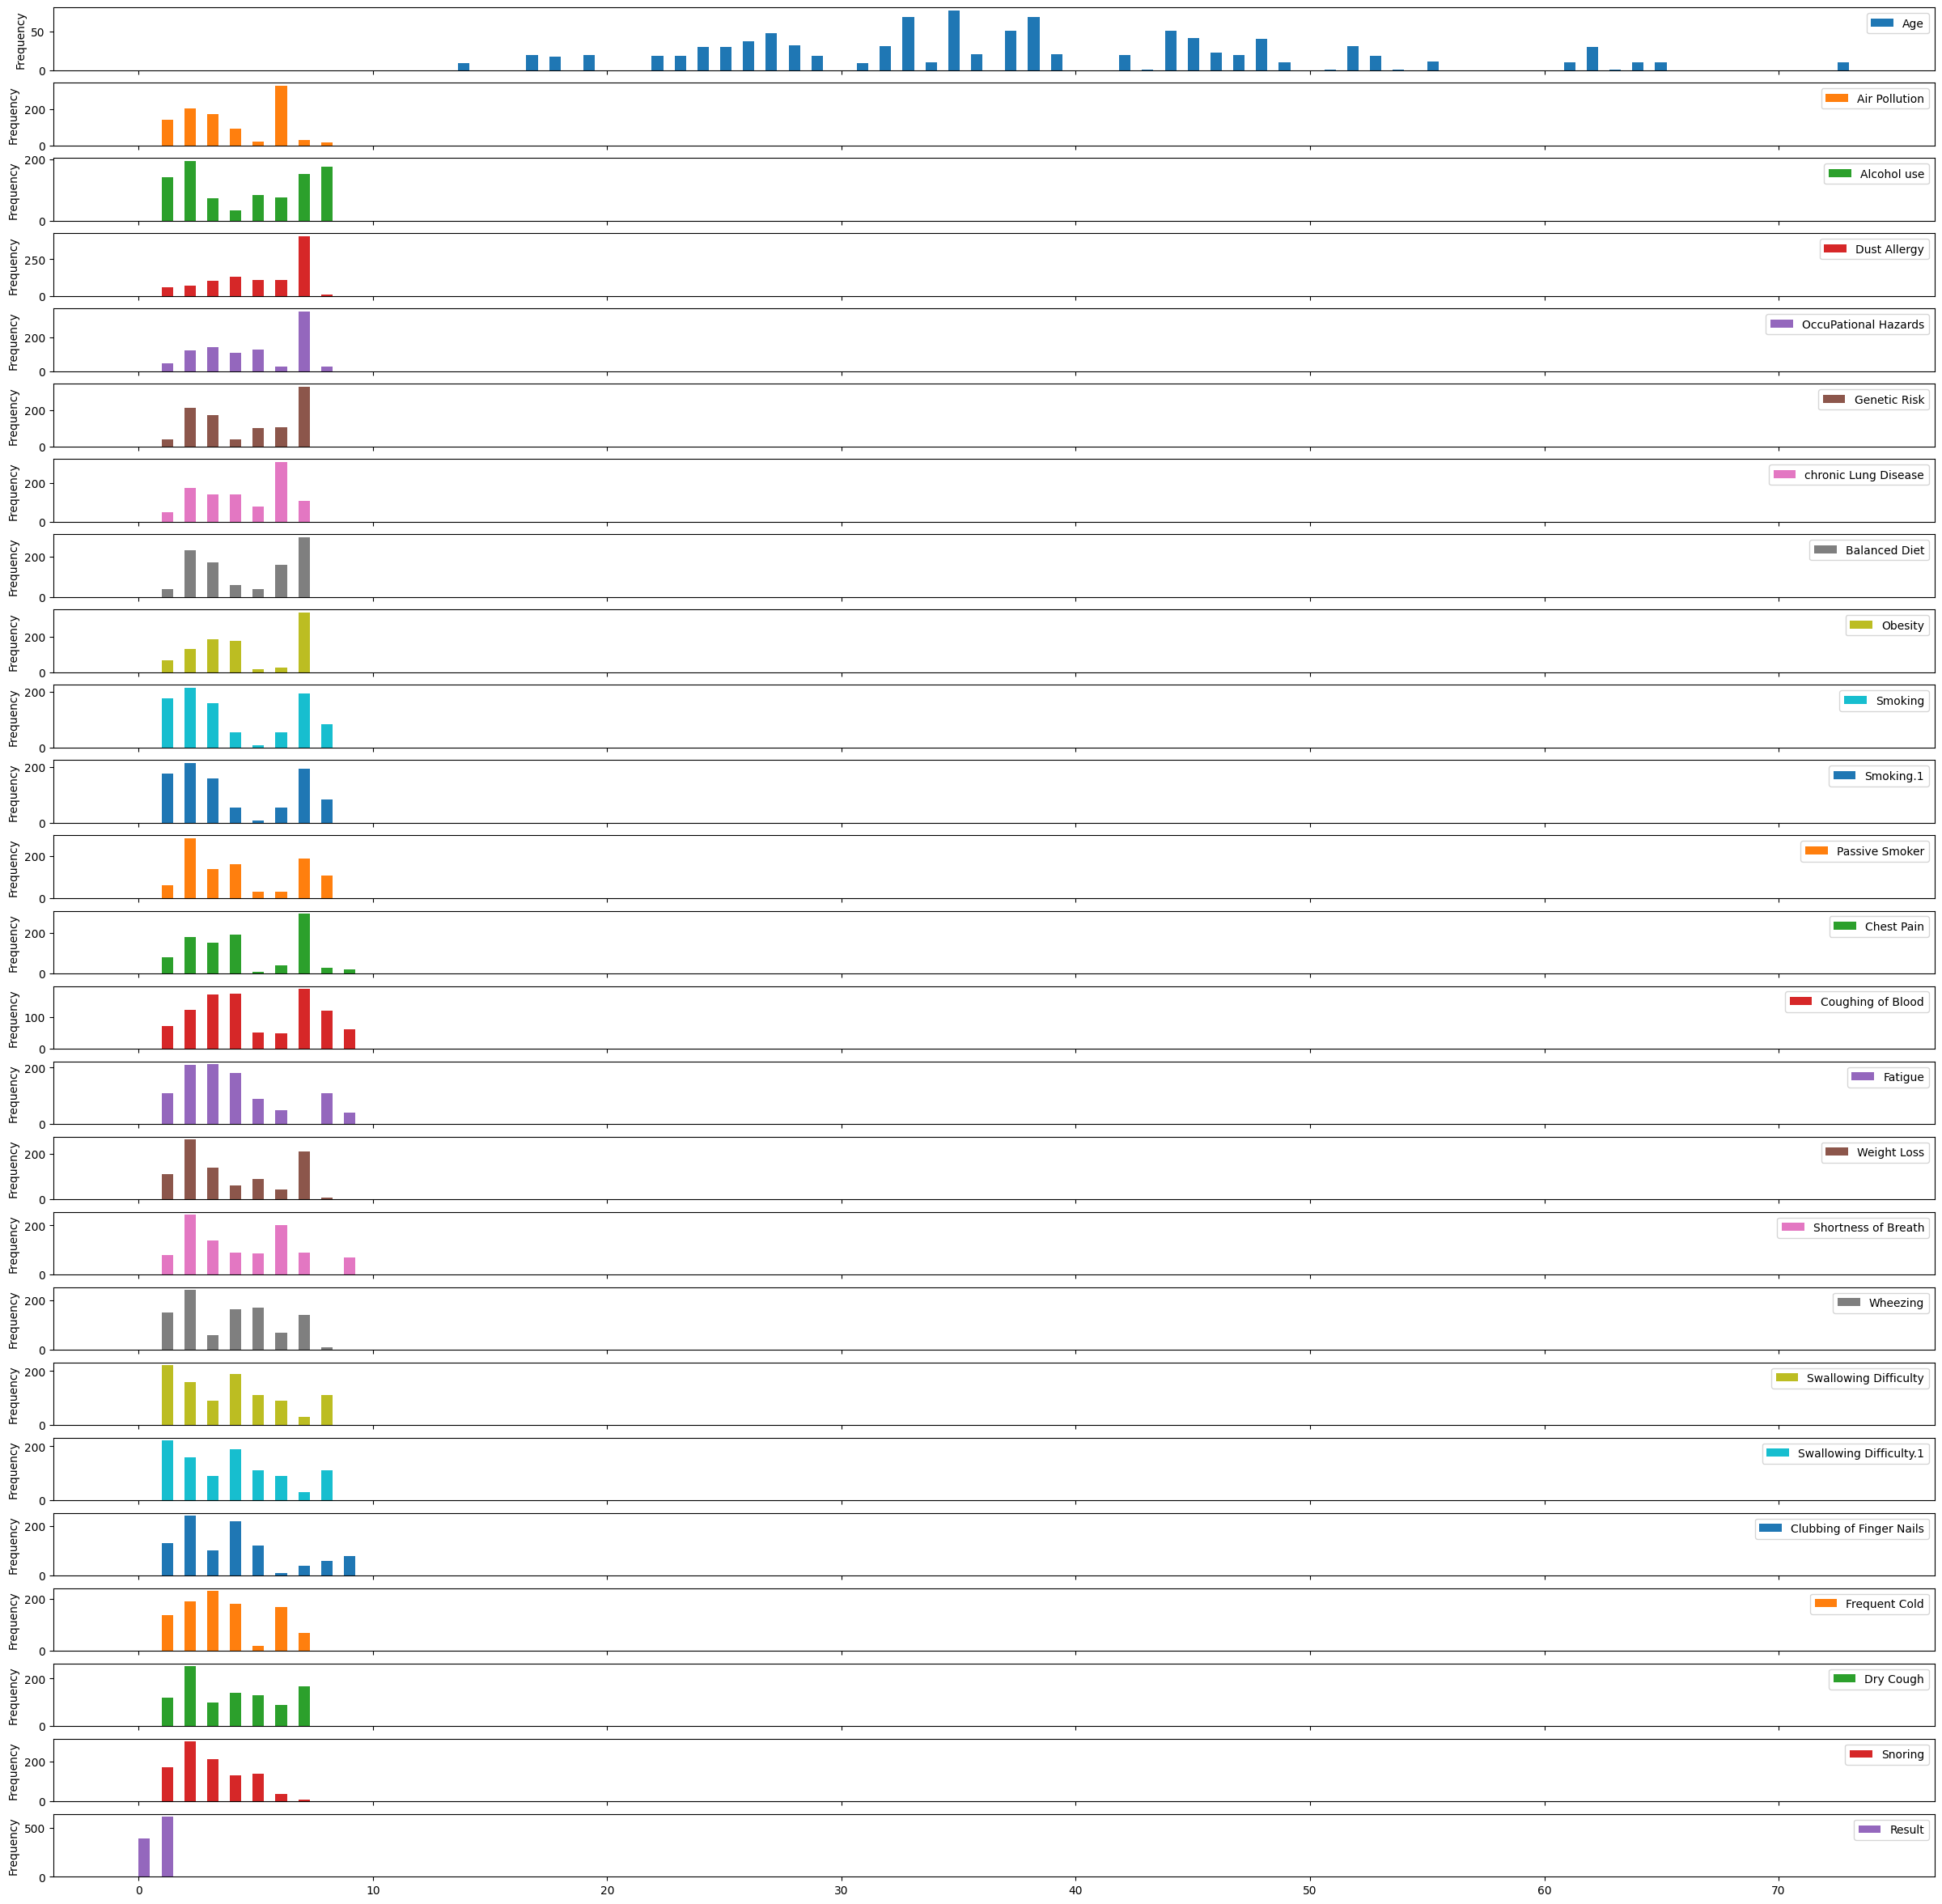

In [7]:
dataset.plot.hist(subplots=True,figsize=(30,30),bins=150)

In [8]:
# PROCESSING DATASET INFORMATION
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Air Pollution             1000 non-null   int64  
 4   Alcohol use               936 non-null    float64
 5   Dust Allergy              1000 non-null   int64  
 6   OccuPational Hazards      950 non-null    float64
 7   Genetic Risk              1000 non-null   int64  
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             1000 non-null   int64  
 10  Obesity                   936 non-null    float64
 11  Smoking                   944 non-null    float64
 12  Smoking.1                 944 non-null    float64
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

<Axes: >

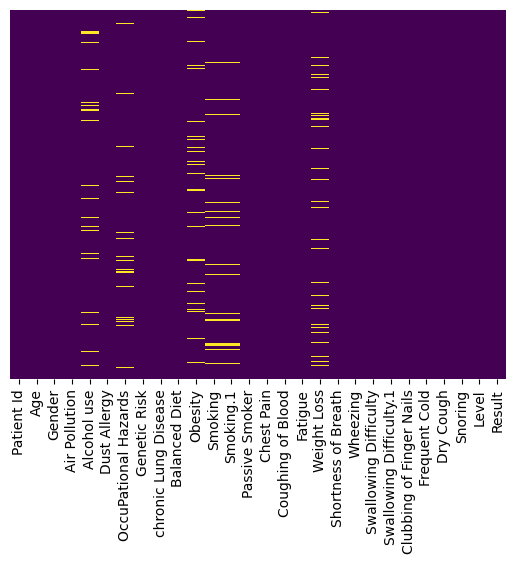

In [9]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# '''
# Dropping Columns

# We are going to be dropping the features 'Smoking' and 'Swallowing Difficulty' as they are duplicates.
# On top, we are also going to be dropping the 'Patient Id' column as it has zero effects on the result.
# '''

dataset = dataset.drop(['Patient Id','Smoking.1','Swallowing Difficulty.1'], axis = 1)

In [12]:
# Imputation for missing values

# Five columns seem to consist missing or null values. 
# For them, we are going to replace them with the mean of all the values.


from sklearn.impute import SimpleImputer

#Alcohol use
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Alcohol use']])
dataset['Alcohol use'] = impute.transform(dataset[['Alcohol use']])

#OccuPational Hazards 
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['OccuPational Hazards']])
dataset['OccuPational Hazards'] = impute.transform(dataset[['OccuPational Hazards']])

#Obesity
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Obesity']])
dataset['Obesity'] = impute.transform(dataset[['Obesity']])

#Smoking
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Smoking']])
dataset['Smoking'] = impute.transform(dataset[['Smoking']])

#Weight Loss
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['Weight Loss']])
dataset['Weight Loss'] = impute.transform(dataset[['Weight Loss']])

<!-- Handling Categorical Features

Our dataset only has two categorical features which are 'Level' and 'Gender'. We are going to replace them with integer values like so.

For 'Levels': Low : 0 Medium : 1 High : 2

For 'Gender': Male : 0 Female : 1 -->

In [13]:
dataset['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [14]:
dataset['Level'] = dataset['Level'].map({'Low':0,'Medium':1,'High':2}) 

In [15]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:

dataset['Gender'] = dataset['Gender'].map({'Male':0,'Female':1}) 

In [17]:
# CORRELATION

data=dataset.corr()
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Result
Age,1.000000,-0.202086,0.099494,0.143145,0.035202,0.064949,0.073151,0.128952,0.004863,0.031502,...,0.103122,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048,0.036527
Gender,-0.202086,1.000000,-0.246912,-0.212776,-0.204312,-0.190913,-0.222727,-0.205061,-0.099741,-0.128184,...,-0.045738,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985,-0.027703
Air Pollution,0.099494,-0.246912,1.000000,0.724167,0.637503,0.596790,0.705276,0.626701,0.524873,0.586698,...,0.233637,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038,0.009865
Alcohol use,0.143145,-0.212776,0.724167,1.000000,0.793018,0.824641,0.851195,0.731560,0.629113,0.625053,...,0.189521,0.427765,0.174649,-0.110343,0.406099,0.170714,0.208486,0.110865,0.693379,-0.002658
Dust Allergy,0.035202,-0.204312,0.637503,0.793018,1.000000,0.813751,0.787904,0.619556,0.647197,0.678862,...,0.301724,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839,0.014696
OccuPational Hazards,0.064949,-0.190913,0.596790,0.824641,0.813751,1.000000,0.867532,0.833280,0.669141,0.675801,...,0.160103,0.354951,0.181755,-0.002528,0.359603,0.072263,0.156654,0.011955,0.651422,-0.003407
Genetic Risk,0.073151,-0.222727,0.705276,0.851195,0.787904,0.867532,1.000000,0.836231,0.679905,0.714717,...,0.251030,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303,-0.015804
chronic Lung Disease,0.128952,-0.205061,0.626701,0.731560,0.619556,0.833280,0.836231,1.000000,0.622632,0.584101,...,0.087287,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971,-0.026844
Balanced Diet,0.004863,-0.099741,0.524873,0.629113,0.647197,0.669141,0.679905,0.622632,1.000000,0.681213,...,-0.001035,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273,-0.039401
Obesity,0.031502,-0.128184,0.586698,0.625053,0.678862,0.675801,0.714717,0.584101,0.681213,1.000000,...,0.287381,0.385274,0.103349,0.131815,0.133342,0.268893,0.174696,0.038693,0.804828,0.004354


<Axes: >

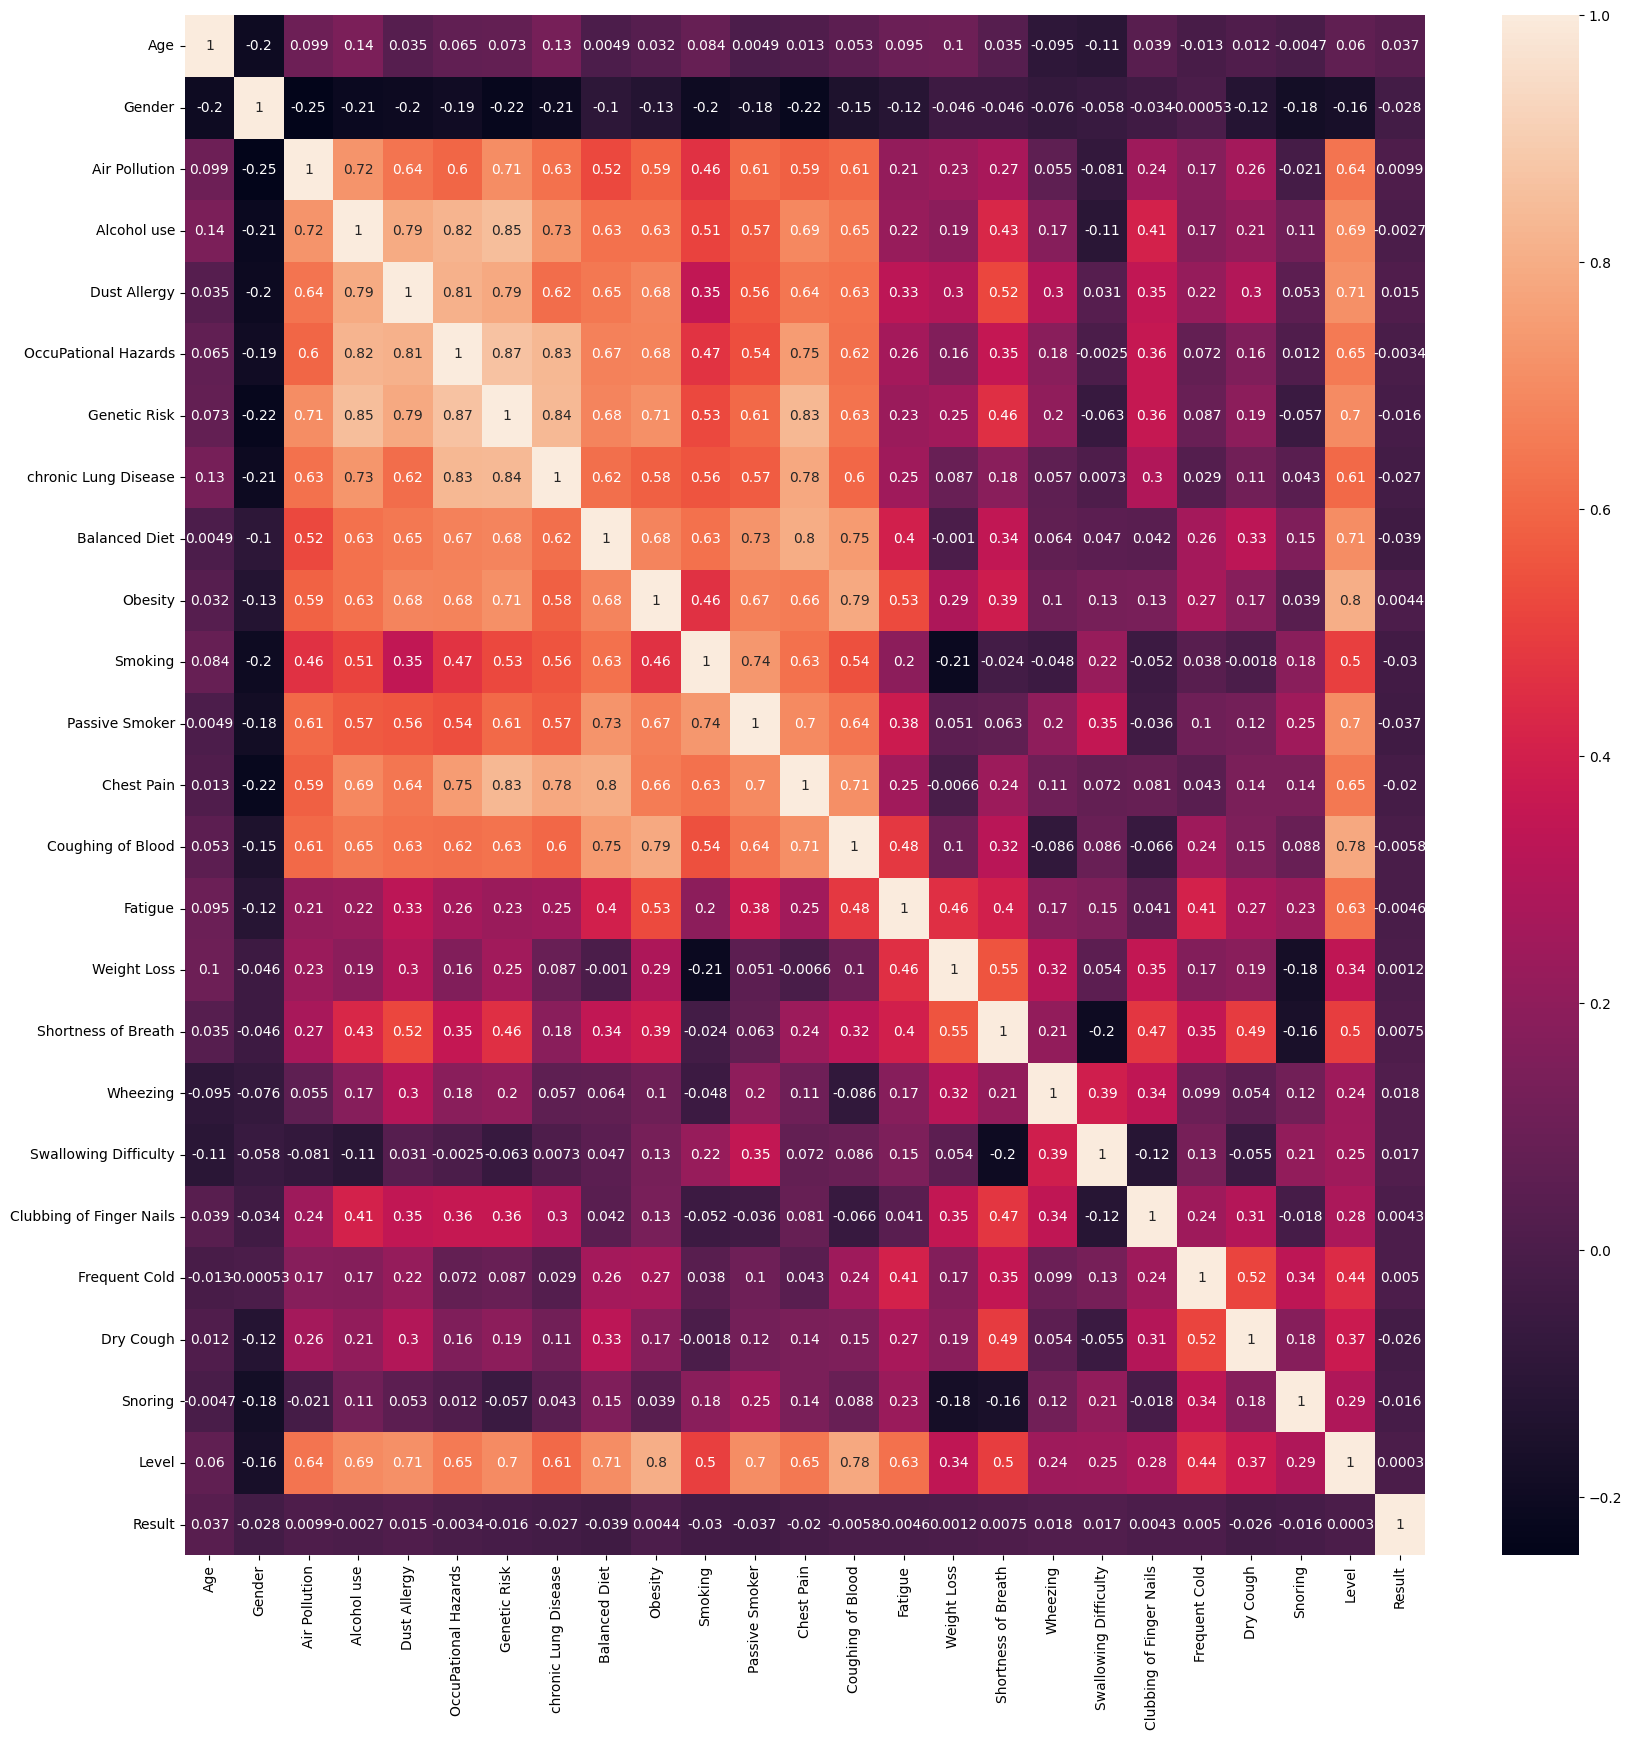

In [18]:
data.style.background_gradient(cmap="coolwarm")
plt.figure(figsize=(20,20))
sns.heatmap(data, annot=True)

In [19]:
dropcolumn = ["Genetic Risk","OccuPational Hazards"]
newdata=dataset.drop(dropcolumn, axis=1)
newdata.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Result
0,33,0,2,4.000000,5,2,2,4.000000,3.0,2,...,4.0,2,2,3,1,2,3,4,0,1
1,17,0,3,1.000000,5,2,2,4.449786,2.0,4,...,3.0,7,8,6,2,1,7,2,1,0
2,35,0,4,5.000000,6,4,6,4.449786,2.0,3,...,7.0,9,2,1,4,6,7,2,2,1
3,37,0,7,4.541667,7,7,7,7.000000,7.0,7,...,2.0,3,1,4,5,6,7,5,2,0
4,46,0,6,8.000000,7,6,7,7.000000,8.0,7,...,2.0,4,1,4,2,4,2,3,2,0


In [20]:
dropcolumn = ["Genetic Risk","OccuPational Hazards"]
newdata=dataset.drop(dropcolumn, axis=1)
newdata.tail()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Result
995,44,0,6,7.0,7,6,7,7.0,7.0,8,...,3.0,2,7,8,2,4,5,3,2,1
996,37,1,6,8.0,7,6,7,7.0,7.0,8,...,6.0,5,7,2,4,3,1,4,2,1
997,25,1,4,5.0,6,4,6,7.0,2.0,3,...,7.0,9,2,1,4,6,7,2,2,1
998,18,1,6,8.0,7,6,7,7.0,8.0,7,...,2.0,4,1,4,2,4,2,3,2,1
999,47,0,6,5.0,6,4,6,7.0,2.0,3,...,7.0,9,2,1,4,6,7,2,2,1


<!-- TRAINING AND TESTING OF DATASET -->

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset_features = newdata.drop(['Result'],axis=1)
dataset_label = newdata['Result']

X_train, X_test, Y_train, Y_test = train_test_split(dataset_features, dataset_label, test_size=0.2,random_state=1,stratify=dataset_label)


#SCALED DATASETS
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
# scaler.fit(X_test)
scaled_X_test = scaler.transform(X_test)

In [22]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", Y_train.shape)
print("y_test shape: ", Y_test.shape)
print("Number of classes ", len(np.unique(Y_train)))

x_train shape:  (800, 22)
x_test shape:  (200, 22)
y_train shape:  (800,)
y_test shape:  (200,)
Number of classes  2


<!-- DecisionTree -->

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,Y_train)

y_pred = clf.predict(X_train)
print("Without Scaling Training accuracy of the model is",metrics.accuracy_score(Y_train, y_pred))
y_pred = clf.predict(X_test)
print("Without Scaling Testing accuracy of the model is",metrics.accuracy_score(Y_test, y_pred))

clf = DecisionTreeClassifier()

clf = clf.fit(scaled_X_train,Y_train)

y_pred = clf.predict(scaled_X_train)
print("With Scaling Training accuracy of the model is",metrics.accuracy_score(Y_train, y_pred))
y_pred = clf.predict(scaled_X_test)
print("With Scaling Testing accuracy of the model is",metrics.accuracy_score(Y_test, y_pred))

Without Scaling Training accuracy of the model is 0.7475
Without Scaling Testing accuracy of the model is 0.485
With Scaling Training accuracy of the model is 0.7475
With Scaling Testing accuracy of the model is 0.485


In [24]:
predictions = clf.predict(scaled_X_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
print(classification_report(Y_test,predictions))

[1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1]
[[21 46]
 [57 76]]
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        78
           1       0.57      0.62      0.60       122

    accuracy                           0.48       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.47      0.48      0.48       200



<Axes: >

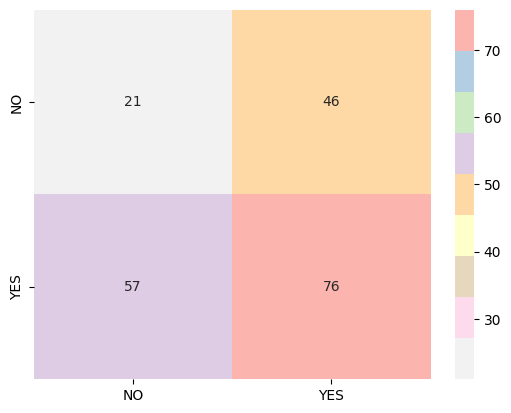

In [25]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)


<!-- NAIVE BAYES -->

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print("Without Scaling Training accuracy of the model is {:.2f}".format(gnb.score(X_train, Y_train)))
print("Without Scaling Testing accuracy of the model is {:.2f}".format(gnb.score(X_test,Y_test)))

gnb.fit(scaled_X_train, Y_train)
print("With Scaling Training accuracy of the model is {:.2f}".format(gnb.score(scaled_X_train, Y_train)))
print("With Scaling Testing accuracy of the model is {:.2f}".format(gnb.score(scaled_X_test,Y_test)))

Without Scaling Training accuracy of the model is 0.61
Without Scaling Testing accuracy of the model is 0.60
With Scaling Training accuracy of the model is 0.61
With Scaling Testing accuracy of the model is 0.60


In [27]:
predictions = gnb.predict(scaled_X_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
print(classification_report(Y_test,predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
[[  8   9]
 [ 70 113]]
              precision    recall  f1-score   support

           0       0.47      0.10      0.17        78
           1       0.62      0.93      0.74       122

    accuracy                           0.60       200
   macro avg       0.54      0.51      0.45       200
weighted avg       0.56      0.60      0.52       200



<Axes: >

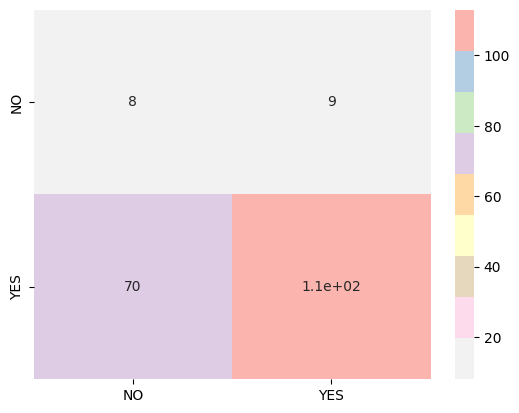

In [28]:

from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)

<!-- RandomForest -->

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc .fit(X_train, Y_train)
print("Without Scaling Training accuracy of the model is {:.2f}".format(rfc .score(X_train, Y_train)))
print("Without Scaling Testing accuracy of the model is {:.2f}".format(rfc .score(X_test, Y_test)))

rfc.fit(scaled_X_train, Y_train)
print("With Scaling Training accuracy of the model is {:.2f}".format(rfc.score(scaled_X_train, Y_train)))
print("With Scaling Testing accuracy of the model is {:.2f}".format(rfc.score(scaled_X_test, Y_test)))

Without Scaling Training accuracy of the model is 0.75
Without Scaling Testing accuracy of the model is 0.51
With Scaling Training accuracy of the model is 0.75
With Scaling Testing accuracy of the model is 0.50


In [30]:
predictions = rfc.predict(scaled_X_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
print(classification_report(Y_test,predictions))

[1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1]
[[14 36]
 [64 86]]
              precision    recall  f1-score   support

           0       0.28      0.18      0.22        78
           1       0.57      0.70      0.63       122

    accuracy                           0.50       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.46      0.50      0.47       200



<Axes: >

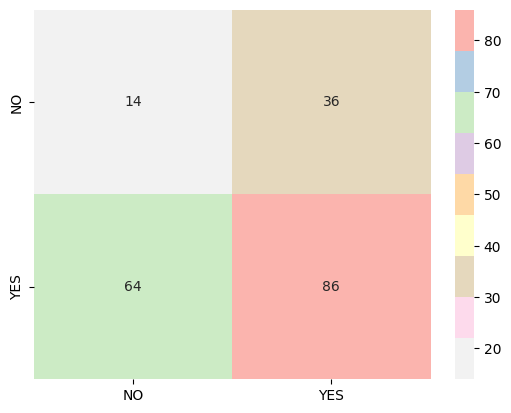

In [31]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)

<!-- SUPOORT VECTOR MACHINE -->

In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
print("Training accuracy of the model is {:.2f}".format(model.score(X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(model.score(X_test, Y_test)))

Training accuracy of the model is 0.61
Testing accuracy of the model is 0.61


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print("\n")
print(classification_report(Y_test,predictions))

[[  0  78]
 [  0 122]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.61      1.00      0.76       122

    accuracy                           0.61       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.61      0.46       200



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

<!-- GridSearchCV -->

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid ={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}
grid= GridSearchCV(SVC(),param_grid,verbose=3)

grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.606 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.606 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.606 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [35]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [36]:
grid_predictions=grid.predict(X_test)

<!-- CONFUSION MATRIX -->

In [37]:
print(confusion_matrix(Y_test,grid_predictions))
print("\n")
print(classification_report(Y_test,grid_predictions))

[[  0  78]
 [  0 122]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.61      1.00      0.76       122

    accuracy                           0.61       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.61      0.46       200



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [38]:
from sklearn.svm import SVC
model = SVC()
model.fit(scaled_X_train,Y_train)
print("Training accuracy of the model is {:.2f}".format(model.score(scaled_X_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(model.score(scaled_X_test, Y_test)))

Training accuracy of the model is 0.63
Testing accuracy of the model is 0.59


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict(scaled_X_test)
print(predictions)
print(confusion_matrix(Y_test,predictions))
print("\n")
print(classification_report(Y_test,predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  3  75]
 [  7 115]]


              precision    recall  f1-score   support

           0       0.30      0.04      0.07        78
           1       0.61      0.94      0.74       122

    accuracy                           0.59       200
   macro avg       0.45      0.49      0.40       200
weighted avg       0.49      0.59      0.48       200



In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(scaled_X_train, Y_train)

print("Test set accuracy: {:.2f}".format(knn.score(scaled_X_test, Y_test)))

Test set accuracy: 0.47


<Axes: >

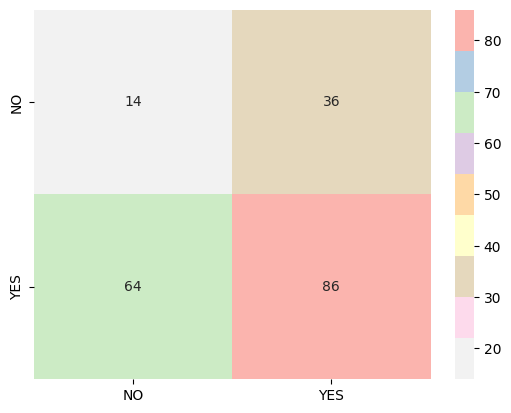

In [41]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['NO' ,'YES' ], yticklabels=['NO' ,'YES'], annot=True)

<!-- SHAP FEATURING 
ON RANDOM FOREST
 -->

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shapes (X_train, X_test, scaled_X_train, scaled_X_test): (800, 22) (200, 22) (800, 22) (200, 22)

RandomForest - Train acc: 0.748, Test acc: 0.510
SHAP returned a numpy array directly
shap array shape: (200, 22, 2)
data shape: (200, 22)


<Figure size 800x600 with 0 Axes>

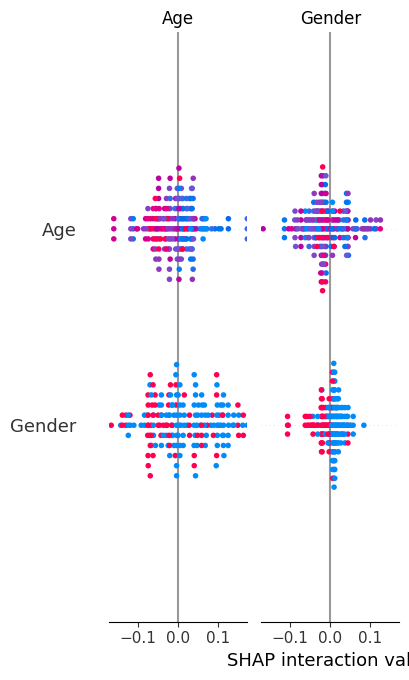

Waterfall plot failed: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (22, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.
SHAP analysis finished.


In [42]:
# --- CELL A: Scale correctly, train RandomForest (on scaled data), and run SHAP robustly ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# --- 1) Prepare X, y (assumes `newdata` exists and has 'Result' column) ---
X = newdata.drop(columns=['Result'])
y = newdata['Result']

# Stratify to preserve class proportions - helpful if label imbalance exists
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# --- 2) Correct scaling: fit ONLY on train, transform train+test ---
scaler = MinMaxScaler()
scaler.fit(X_train)                      # FIT only on train
scaled_X_train = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with same column names (important for SHAP plots)
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=X.columns, index=X_train.index)
scaled_X_test_df  = pd.DataFrame(scaled_X_test,  columns=X.columns, index=X_test.index)

print("Shapes (X_train, X_test, scaled_X_train, scaled_X_test):",
      X_train.shape, X_test.shape, scaled_X_train_df.shape, scaled_X_test_df.shape)

# --- 3) Train RandomForest on scaled data (you can switch to whichever final model you prefer) ---
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(scaled_X_train_df, y_train)

print("\nRandomForest - Train acc: {:.3f}, Test acc: {:.3f}".format(
    rfc.score(scaled_X_train_df, y_train), rfc.score(scaled_X_test_df, y_test))
)

# --- 4) SHAP explainability (robust handling for different SHAP versions & outputs) ---
# Note: TreeExplainer is recommended for tree models (fast & exact).
explainer = shap.TreeExplainer(rfc)

# Try to compute shap values and handle different return types
shap_values_raw = None
try:
    # many versions: explainer.shap_values returns list (one per class) for classifiers
    shap_values_raw = explainer.shap_values(scaled_X_test_df)
except Exception as e:
    # fallback to the newer API (explainer(X) -> Explanation object)
    print("TreeExplainer.shap_values failed with:", e)
    print("Trying explainer(...) API")
    try:
        shap_expl = explainer(scaled_X_test_df)  # Explanation object
        # shap_expl.values shape may be (n_samples, n_features) for binary/regression,
        # or (n_samples, n_features, n_outputs) for multi-output.
        shap_values_raw = shap_expl
    except Exception as e2:
        print("explainer(...) also failed:", e2)
        shap_values_raw = None

# --- 5) Normalize shap_values into a consistent array (sv) and select "positive" class if needed ---
sv = None
expected_value = None

if shap_values_raw is None:
    raise RuntimeError("SHAP values could not be computed. Check model/explainer")

# Case A: shap_values_raw is a list (common: one array per class)
if isinstance(shap_values_raw, list):
    print("SHAP returned a list with length", len(shap_values_raw))
    # For binary classification len==2: shap_values_raw[1] -> contribution to class 1 probability
    # Choose class 1 (positive) by default; change to 0 if you want negative class.
    class_idx = 1 if len(shap_values_raw) > 1 else 0
    sv = np.array(shap_values_raw[class_idx])
    # If tree explainer also has expected_value as list:
    try:
        expected_value = explainer.expected_value[class_idx]
    except Exception:
        expected_value = None

# Case B: shap_values_raw is an Explanation object (shap 0.40+)
elif hasattr(shap_values_raw, "values"):
    print("SHAP returned an Explanation object")
    # shap_values_raw.values may be shape (n_samples, n_features) (binary) OR
    # (n_samples, n_features, n_outputs) (multi-output)
    vals = np.array(shap_values_raw.values)
    if vals.ndim == 3:
        # (n_samples, n_features, n_outputs) -> pick output/class index (1 preferred)
        class_idx = 1 if vals.shape[2] > 1 else 0
        sv = vals[:, :, class_idx]
    else:
        sv = vals
    try:
        expected_value = shap_values_raw.base_values
    except Exception:
        expected_value = None

# Case C: shap_values_raw is a numpy array (rare)
elif isinstance(shap_values_raw, np.ndarray):
    print("SHAP returned a numpy array directly")
    sv = shap_values_raw
else:
    raise RuntimeError("Unhandled SHAP output type: {}".format(type(shap_values_raw)))

# --- 6) Final sanity check: shapes must match (n_samples, n_features) ---
print("shap array shape:", sv.shape)
print("data shape:", scaled_X_test_df.shape)
if sv.shape[0] != scaled_X_test_df.shape[0] or sv.shape[1] != scaled_X_test_df.shape[1]:
    # if last-dimension is extra bias column, try to drop last col
    if sv.shape[1] == scaled_X_test_df.shape[1] + 1:
        print("Dropping last SHAP column (likely bias/offset) to match feature count.")
        sv = sv[:, :-1]
    else:
        raise AssertionError("SHAP values shape {} incompatible with data shape {}"
                             .format(sv.shape, scaled_X_test_df.shape))

# --- 7) Plot SHAP summary (global importance) + example waterfall for first sample ---
plt.figure(figsize=(8,6))
shap.summary_plot(sv, scaled_X_test_df, feature_names=scaled_X_test_df.columns, show=True)

# Individual explanation (waterfall) for the first test sample
try:
    if expected_value is not None:
        # If expected_value is an array or scalar, use it. shap.plots.waterfall handles Explanation objects better.
        expl = shap.Explanation(values=sv[0], base_values=expected_value, data=scaled_X_test_df.iloc[0], feature_names=scaled_X_test_df.columns)
        shap.plots.waterfall(expl)
    else:
        # Use shap.force_plot alternative (may open in notebook)
        shap.plots.waterfall(shap.Explanation(values=sv[0], base_values=np.sum(sv[0]) * 0, data=scaled_X_test_df.iloc[0], feature_names=scaled_X_test_df.columns))
except Exception as e:
    print("Waterfall plot failed:", e)

print("SHAP analysis finished.")


In [43]:
import joblib

# Save your scaler and trained RandomForest model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rfc, "lung_cancer_model.pkl")

print(" Model and scaler saved!")


 Model and scaler saved!
